# Data Quality

#### Pourquoi est-ce important ?

Depuis l’explosion du big data, de grands volumes de données ont été récoltés par les entreprises du numérique. Cependant, comme le dit l'expression célèbre dans le milieu de l'informatique : Garbage In, Garbage Out, les informations qu'une entreprise peut tirer des données ne sont bonnes que si les données le sont elles-mêmes. Afin de pouvoir exploiter les données correctement, il est très important de s’assurer de leur qualité. En effet, des données de mauvaise qualité peuvent avoir des impacts importants sur l'organisation et les prises de décisions d'une entreprise. Par exemple : Un pourcentage important d'adresses incorrectes dans une base de données qui auront un fort impact négatif sur une campagne marketing.

#### Les principes

Pour pouvoir considérer que des données sont de bonne qualité, il faut qu’elle respectent les six principes suivant :

- La <b>cohérence</b> : les données doivent être au même fortmat. Si elles sont dans plusieurs bases, ou proviennent de plusieurs sources différentes, elles doivent être cohérentes entre elles.
- La <b>validité</b> : les données doivent être stockées sans erreurs, fautes de frappes ou de syntaxe.
- La <b>complétude</b> : les données ne doivent pas posséder d’informations manquantes.
- La <b>précision</b> : ça peut paraître évident mais il faut que les données soient correctes. Il faut par exemple faire attention à maintenir une bonne précision des données lorsqu’on veut remplacer des valeurs manquantes.
- La <b>disponibilité</b> : les données sont accessibles facilement et rapidement par les personnes qui en ont besoin.
- L’<b>actualité</b> : les données doivent être mises à jour

#### Mise en place d'une stratégie Data Quality en entreprise

Cette [étude datant de 2011](http://www.jiem.org/index.php/jiem/article/view/232/130) démontre que les coûts associés aux données incorrectes sont toujours supérieurs aux coûts associés à la maintenance de la Data Quality.

Dans le management de la Data Quality, il y a trois piliers principaux :

- La  <b>gouvernance des données</b>. L’équipe qui en est chargée doit surveiller la qualité des données, leur mise à jour, les procédures en place pour maintenir la qualité. Tout cela doit être adapté en s'interrogeant sur les objectifs importants de l’entreprise. Il faut en effet bien faire l’arbitrage entre le coût d’implémentation des programmes de Data Quality et le coût en termes financiers et de réputation associé à l’utilisation de données de mauvaise qualité. De plus, il faut assurer la sensibilisation des autres membres de l’entreprise à l’importance de la qualité des données.

- La <b>Data Quality Assurance (QA)</b>: désigne l’ensemble des procédures et techniques qui permettent d’identifier les données inexactes, incohérentes, incomplètes et donc de garantir le maintien de la qualité des données au fil du temps. La Data Quality Assurance permet de mesurer le niveau d’incohérence, d’incomplétude et de précision des données à disposition.

- Le <b>contrôle de la qualité</b> : en aval des méthodes de Data Quality Assurance, l’implémentation de protocoles de contrôle de qualité permet de s’assurer que les données sont exactes et que les bases ne sont pas encombrées de données inutiles. Cela consiste à décider si la donnée est utile, pertinente, mérite d’être exploitée ou bien si elle doit être supprimée. Il s’agit ici de contrôler aussi bien la qualité des données que l’usage qui en est fait par les collaborateurs de l’entreprise.

# 1 - Inspection des données et standardisation 

Dans un premier temps, on va faire gagner en <b>cohérence</b> & <b>validité</b> nos jeux de données en les inspectant et en réalisant une première standardisation.

- La cohérence : en s'assurant que chaque variable est au bon type, en standardisant les numéros de téléphones, les dates, en mettant en majuscule les noms et villes.
- La validité : en corrigeant les fautes de frappes, en supprimant les doublons.

La première chose à faire avant d'explorer un jeu de données est de s'intéresser aux métadatas s'il y en a et aux informations qu'on a sur les données:

En premier lieu, d'où viennent ces données ? Comment ces données ont-elles été collectées ? Quels types de fichiers a-t-on ? De quelles tailles ? Quelles sont les caractéristiques présentes ?

Les jeux de données collectés manuellement contiennent souvent des erreurs ou des approximations. Face à de telles données, il est nécessaire de les nettoyer, et de garder en mémoire qu'elles ne sont pas toujours représentatives de la réalité.

Il est recommandé de vérifier que les types de variables associés à chaque colonne soient en accord avec ce que représentent ces colonnes.

Voici un tableau de correspondance des types de données de pandas avec ceux de python et numpy :
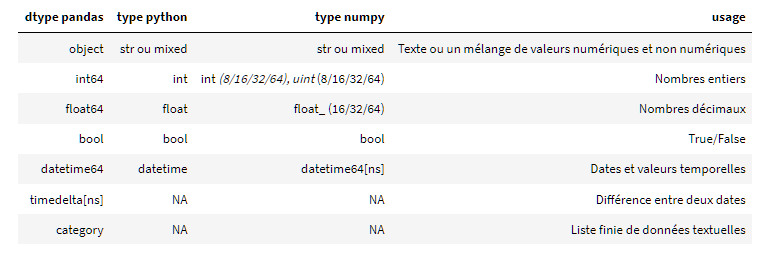

In [ ]:
import pandas as pd

clients = pd.read_csv('Clients_bq.csv')
print( "Infos Clients :\n")
# Obtenir des informations sur un DataFrame (nom des colonnes & Dtype)
clients.info()

### Standardisation des données - s'assurer que chaque variable est au bon type

Une variable numérique (int ou float) doit représenter une quantité, tandis qu'une variable catégorielle (object) représente des catégories ou des niveaux.

Par exemple, le Code Postal est de type int, alors qu'il ne définit pas une quantité. Il devrait donc être au format string (str).

In [ ]:
# Transformer une colonne en chaîne de caractère
clients['Code Postal'] = clients['Code Postal'].astype(str)

# Vérifier que les codes postaux correspondent tous à un code numérique à 5 chiffres, compris entre 01000 et 96000 (métropole).
(('01000' < clients['Code Postal']) & (clients['Code Postal'] < '96000')).sum() == clients.shape[0]
# Il est possible de comparer des strings en fonction de l'ordre alphanumérique.

### Standardisation des données - s'assurer de la cohérence du format des données

Pour s'assurer de la qualité de la donnée, il est aussi nécessaire de vérifier la cohérence de cette dernière. Quand elle est collectée par des personnes différentes, sur des périodes longues, il arrive fréquemment que les données ne soient pas rédigées de la même manière.

L'objectif de cette étape est de s'assurer que chaque ligne suit les mêmes règles, et que 2 lignes qui contiennent la même information ne puissent pas être écrites de 2 manières différentes.

Prenons le DF suivant : 
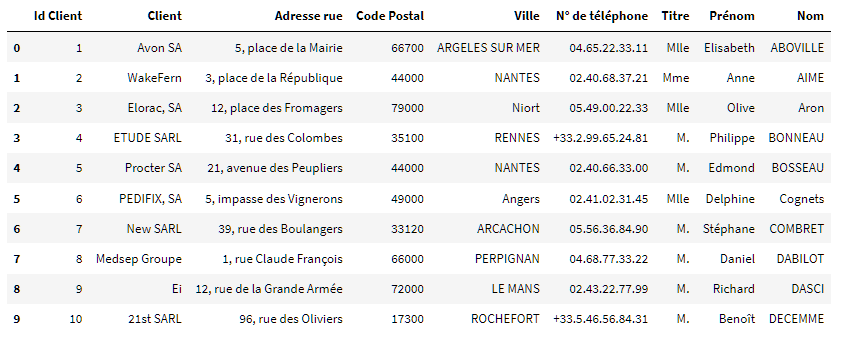

In [ ]:
# Pour corriger les numéros de téléphone / remplacer un +33 dans une ligne par autre chose
for (index, numero) in enumerate(clients["N° de téléphone"]):
    if numero[0]=='+':
        clients.loc[index, 'N° de téléphone']='0' + clients.loc[index, 'N° de téléphone'][4:]

La méthode upper() permet de mettre l'ensemble des caractères d'un string en majuscule.

Par exemple :

'minuscule'.upper()
> "MINUSCULE"

In [ ]:
clients['Nom'] = clients['Nom'].apply(lambda x : x.upper())  
clients['Ville'] = clients['Ville'].apply(lambda x : x.upper())

On peut également vérifier les valeurs uniques pour repérer par exemple des données mal ortographiées.

Lors de l'analyse de données, il est également très important de s'assurer de l'unicité de certaines variables. Notamment avec les variables textes, qui peuvent avoir été remplies de différentes façons pour désigner la même personne/entité.

Exemple : La variable 'Pays' d'un jeu de données pourrait contenir à la fois les valeurs "GB", "Grande-Bretagne" et "UK" qui désignent pourtant le même pays, ce qui pourrait entraîner des analyses erronées par la suite.

Nous n'avons pas ce genre de problèmes dans nos DataFrames. Nous verrons cependant dans un notebook suivant comment gérer ce problème.

In [ ]:
#Affiche les différentes valeurs prises par la variable Ville
print(clients['Ville'].unique())

## On s'aperçoit que "RENES" et "PERPINAN" sont mals orthographiés, et que "PARIS LA DÉFENSE" fait doublon avec "PARIS"
clients.replace({'RENES' : 'RENNES', 
                 'PERPINAN' : 'PERPIGNAN',
                 'PARIS LA DÉFENSE' : 'PARIS'},
                inplace = True)

### Standardisation des données - gérer les doublons

Les doublons sont également une source d'erreurs et peuvent parfois fausser les analyses faites sur les données qui en contiennent. Sauf exception, il est généralement préférable de supprimer les lignes entièrement copiées pour garantir bonne validité des données.

In [ ]:
#Affiche le nombre de doublons
print("Nombre de doublons :", clients.duplicated().sum())

#Supprime les doublons
clients = clients.drop_duplicates()

### Standardisation des données - gérer les dates

Les dates sont un type de format qui pose souvent problème, et il faut toujours s'assurer de l'uniformité entre différentes variables datées avant d'utiliser un jeu de données. Elles doivent être : du même type, au même format et correspondre à des dates réelles. Pour cela, on utilise souvent la bibliothèque datetime, et la classe du même nom qu'elle contient.

In [ ]:
from datetime import datetime as dt

Ventes_2017['Date de Commande'].dtype # -> 'O' = object, pas au format date
Ventes_2017['Date de Livraison'].dtype # -> 'O' = object, pas au format date

Ventes_2017['Date de Commande'] = pd.to_datetime(Ventes_2017['Date de Commande'])
Ventes_2017['Date de Livraison'] = pd.to_datetime(Ventes_2017['Date de Livraison'])

# Ajouter une colonne nommée "Jour de Livraison" à Ventes_globales qui contiendra le jour de la semaine durant lequel la livraison a été effectuée. 
# Faire de mêmes en ajoutant une colonne "Mois de Commande". (indice)
Ventes_globales['Jour de Livraison'] = Ventes_globales['Date de Livraison'].dt.weekday
Ventes_globales['Mois de Commande'] = Ventes_globales['Date de Commande'].dt.month

# Toujours dans Ventes_globales, ajouter une colonne "Nouveaux Produits" qui contient False si la commande a été passée en 2017 et True sinon.
Ventes_globales["Nouveaux Produits"] = Ventes_globales['Date de Commande'].dt.year==(2018|2019)

# Regrouper les 3 colonnes 'Categorie 1', 'Categorie 2' et 'Categorie 3' sous une seule colonne 'Categorie' qui contient 1, 2 ou 3 en fonction de la catégorie du produit.
produits['Categorie'] = produits['Categorie 1'] + 2*produits['Categorie 2'] + 3*produits['Categorie 3']
produits.head()

#  Changer le type de la colonne 'Categorie' pour avoir des str. Ensuite, supprimer les colonnes 'Categorie 1', 'Categorie 2' et 'Categorie 3' qui sont maintenant inutiles.
produits['Categorie'] = produits["Categorie"].astype('str')
produits.drop(['Categorie 1', 'Categorie 2', 'Categorie 3'], axis=1, inplace=True)

# 2 - Standardisation des données numériques

Les variables numériques sont le type de données dont les problèmes de qualité sont parfois les moins évidents à repérer. En effet, lors de l'assemblage de données provenant de différentes sources, il se peut que des variables similaires ne soient pas entrées à la même échelle, que les unités de mesure diffèrent ou encore que les définitions mathématiques de ces variables diffèrent d'une source à l'autre. D'autres soucis interviennent, notamment lorsque des données présentent des <b>valeurs aberrantes (outliers)</b> ou que des transformations mathématiques ont été mal appliquées sur certaines variables.

- Identifier les valeurs aberrantes (outliers)
- Arrondir à la même unité les variables qui seront susceptibles d'être comparées entre elles lors d'une étude ultérieure
- Faire attention aux erreurs de placement de virgules
- Faire attention de ne pas normaliser des colonnes qui ne devraient pas l'être

Un <b>boxplot (ou boîte à moustaches)</b> est une méthode permettant de représenter graphiquement des variables numériques à travers leurs quartiles. 

- La <b>boîte</b> s'étend des valeurs des quartiles <b>Q1 à Q3</b>
- Elle possède une <b>ligne</b> à la <b>médiane</b> (Q2).
- Les <b>"moustaches"</b> s'étendent à partir des bords de la boîte pour montrer l'étendue des données. Par défaut, elles ne mesurent <b>pas plus de  1.5 × IQR  (IQR = Q3 - Q1) à partir des bords de la boîte</b>, et se terminent au point de données le plus éloigné dans cet intervalle.
- Les <b>valeurs aberrantes</b> sont tracées sous forme de points séparés</b>, au-delà de ces limites. Une valeur aberrante est une valeur qui diffère grandement de la distribution d’une variable. 

On peut alors repérer des données aberrantes et les corriger avec la méthode loc.

In [ ]:
# Tracer un boxplot
df.boxplot('loan_amnt')
df['loan_amnt']

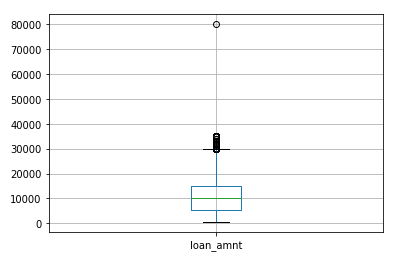

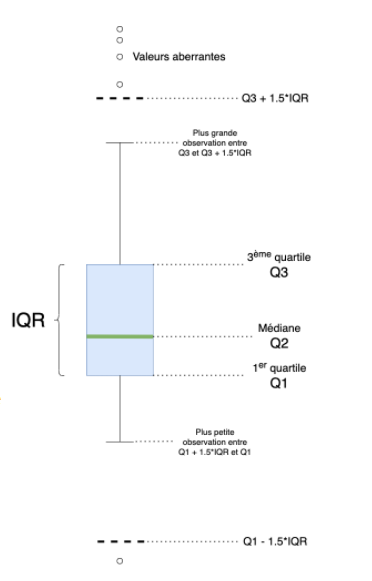

In [ ]:
# Lire la ligne selon le montant max d'une colonne 
df.loc[df.loan_amnt.idxmax()]
# Alternative : en filtrant
df[df.loan_amnt==df.loan_amnt.max()]

# On remplace la valeur contenue dans la colonne loan_amnt avec la plus grande valeur par 8000
df.loc[df.loan_amnt.idxmax(),'loan_amnt'] = 8000

In [ ]:
# Afficher les montants de crédit au dessus de 30 000
df[df.loan_amnt>30000]

# Afficher le revenu annuel moyen de l'ensemble des clients, arrondi
round(df.annual_inc.mean(),2)

# Afficher le revenu annuel moyen pour les clients dont le montant du crédit dépasse les 30000 dollars.
round(df[df.loan_amnt>30000].annual_inc.mean(),2))

### Distribution d'une valeur
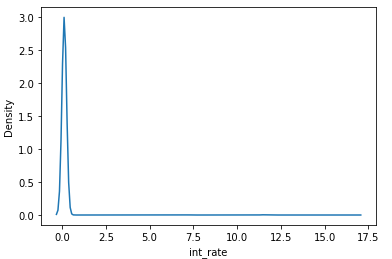

In [ ]:
import seaborn as sns

sns.kdeplot(df.int_rate);

# Pour afficher les crédits dont le taux d'intérêt est > 1
df[df.int_rate>1]

# Pour chaque ligne avec un taux d'intérêt >1, on corrige ce taux en le divisant par 100
df.loc[df.int_rate>1, 'int_rate']/=100

## Ne pas oublier de faire des sauvegardes des DataFrame pour éviter des traitements irréversibles

### Normalisation MinMax

In [ ]:
# Appliquer un encodage des variables catégorielles en indicatrices, suivie d'une normalisation MinMax
# Normalization = rescale les values entre 0 et 1
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_dummies), columns=df_dummies.columns)

# 3 - Gestion des donées manquantes / Complétude des données

Assurer la <b>complétude</b> d'un jeu de données & sa <b>précision</b> lorsqu'il s'agit de les remplacer.
Voici quelques raisons pour lesquelles un jeu de données peut présenter des données manquantes : 

- L'utilisateur a oublié de remplir un champ.
- Des données ont été perdues lors d'un transfert manuel à partir d'une ancienne base de données.
- Il y a eu une erreur de programmation.
- L'utilisateur a choisi de ne pas remplir un champ lié à ses convictions sur la façon dont les résultats seraient utilisés ou interprétés.

### Identification de valeurs manquantes

L'affichage du tableau montre que certaines données sont manquantes (NaN). Ces valeurs manquantes standards sont celles que pandas détectent automatiquement.
Lorsqu'un tableau importé avec pandas contient des cases vides, celles-ci sont automatiquement détectées et remplacées par des NaN. Il en va de même pour les cases contenant des NA, N/A ou n/a dans le fichier.
<b>Afin de détecter les valeurs manquantes de manière facile et sur tout type de tableaux, il suffit d'utiliser les fonctions isna() et notna()</b>, qui possèdent également leurs équivalents en méthodes pour les Dataframes et Series.
La première renvoie True pour chaque élément manquant et False sinon. La seconde retourne l'inverse.

<b>L'utilisation de isna() est recommandée, car en Python, 2 deux NaN ne sont pas égaux lors d'une comparaison. </b>

In [ ]:
import numpy as np

# Afficher le nb total de valeurs manquantes par colonne de Produits
Produits.isna().sum(axis=0)

# Afficher pour chaque ligne si la donnée d'une colonne est manquante
print('Prod ' + Produits.Index.astype(str) + ': Catégorie présente : ' + Produits.Categorie.notna().astype(str))

# Vérifier si un élément d'une colonne est un np.nan
print(pd.isna(Produits.Nom_Produit[5]))

#### Quid dans le cas de valeurs " " (vides)

In [ ]:
# Afficher les valeurs uniques d'une colonne
Ventes['Id Client'].unique()
>> array([32, 31, 50, 12, 18, 25, 20, 24, 1, 46, 47, 21, 33, 4, 48, 8, 11,
       35, 9, 28, 45, 27, 22, 26, 17, 29, 5, 13, 15, 44, 14, 3, 36, 10,
       16, 43, 40, 38, 6, 37, 41, 30, 39, 49, 34, 2, 23, 7, 42, 19, ' '],
      dtype=object) 
# L'array ci-dessus comprends un espace ' '

# Affiches les occurences / fréquence des modalités de la variable 'Canal'
Ventes.Canal.value_counts()

#### On peut demander à lire un fichier en transformant/remplaçant en NaN certaines valeurs

In [ ]:
# Lire un fichier en précisant que les 
# " ", "?" et "na" doivent être considérés comme valeurs manquantes à l'aide de l'argument na_values.
import numpy as np
Ventes = pd.read_excel('Ventes2019.xlsx', na_values= [" ", "?","na"])
pd.isna(Ventes).sum()

# Afficher les infos descriptives sur une variable (colonne)
Ventes.Quantité.describe()

# Afficher les lignes en fonction de données d'une colonne
Ventes[(Ventes.Quantité < 5) | (Ventes.Quantité>12)]

# Remplacer les valeurs d'une colonne en dehors d'un intervalle par np.nan
Ventes.loc[(Ventes.Quantité < 5) | (Ventes.Quantité>12), 'Quantité'] = np.nan
# Alternative : on remplace les -1 (valeurs déconnantes)
Ventes.Quantité.replace(-1, np.nan, inplace=True)


### Remplacement des valeurs manquantes

In [ ]:
# On détecte les COLONNES contenant au moins une valeur manquante
df.isna().any(axis = 0)

# On utilise l'indexation conditionnelle pour afficher les entrées
# contenant des valeurs manquantes
df[df.isna().any(axis = 1)]

# On compte le nombre de valeurs manquantes pour chaque LIGNE
df.isnull().sum(axis = 1)
df.isna().sum(axis=0) # indique combien de NaN par colonne

- Pour remplacer l'ensemble des NAs d'une Series ou d'un Dataframe par la même valeur, il suffit d'<b>indiquer cette valeur dans la méthode.</b>

In [ ]:
df.fillna(0) #pour remplacer tous les NAs par 0

- Le paramètre <b>method</b> permet d'utiliser les <b>valeurs non manquantes précédentes (method = 'pad') ou suivantes (method = 'bfill')</b> pour remplacer les valeurs manquantes d'une Série.

In [ ]:
df.fillna(method='pad') # chaque NA sera remplacée par la dernière valeur non NA de sa colonne


- Il est également possible d'<b>utiliser un dictionnaire ou une série, dont les labels (pour les dictionnaires) ou index (pour les séries) correspondent aux colonnes du DataFrame</b> que vous souhaitez remplir:

In [ ]:
df.fillna({'col_1' : val_1 , 'col_2' : 'val_2'}) # Remplace les NAs de la colonne 'col_1' par val_1 et celles de la colonne 'col_2' par val_2 

df.fillna(df.mean()) # Remplace les NAs de chaque colonne par la moyenne de la colonne (ok car les noms des colonnes correspondent)

In [ ]:
# Exemples

# On a une série de numéro de produit (Produit #1, Produit #2...) avec certains numéros qui ont sauté. 
# Pour corriger, on va prendre le numéro de ligne  : 
Produits.Nom_Produit.fillna('Produit '+Produits.Index.astype(str), inplace=True)

# Remplacer la valeur manquante de la variable 'Catégorie' par la valeur la plus fréquente.
Produits.Categorie.fillna(Produits.Categorie.mode()[0], inplace=True)

# Calculer dans une variable mean_diff_2 la différence moyenne 
# entre le prix et le coût unitaire pour les produits de Catégorie 2.
mean_diff_2 = (Produits.loc[Produits.Categorie == 'Categorie 2', 'Prix unitaire'] 
               - Produits.loc[Produits.Categorie == 'Categorie 2', 'Cout unitaire']).mean()


### Algorithmes de complétion - K Plus Proches Voisins

Un des algorithmes de complétion des valeurs manquantes est appelé <b>KnnImputer</b>. Cet algorithme, dit des <b>'K Plus Proches Voisins'</b>, part du principe que des <b>données avec des valeurs proches sur d'autres colonnes que celle où manque la donnée auront aussi des valeurs proches sur la colonne où manque la donnée</b>.

La méthode fit_transform appliquée à un objet de classe KNNImputer permet de retourner un array dont les valeurs manquantes sont remplacées. Il est possible de le convertir en DataFrame en utilisant la fonction pd.DataFrame mais les noms des colonnes seront perdus dans l'opération.

In [ ]:
# Importer la fonction KNNImputer depuis sklearn.impute. 
# Instancier un objet inputer de la classe KNNImputer avec comme paramètre n_neighbors=4.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors= 4)
# n_neighbors = nombre de samples voisins sur lesquels se baser. Par défaut, il vaut 5

# Créer un DataFrame val_num contenant toutes les variables numériques de Ventes.
# On crée un df en supprimant les colonnes catégorielles
val_num = Ventes.drop(["N° de Commande", "Canal", "Date de Commande", "Date de Livraison"], axis=1)

# Remplacer les valeurs manquantes de val_num avec la méthode des k-plus proches voisins. 
# Ne marche que si toutes les colonnes sont numériques
val_num = imputer.fit_transform(val_num)
val_num = pd.DataFrame(val_num)

Ventes["Quantité"]=val_num[2]

# Afficher les valeurs prises par la variable 'Quantité' dans Ventes et dans val_num.
print(Ventes["Quantité"].unique())
print(val_num["Quantité"].unique())

#### Remplacer par la valeur non-manquante suivante

In [ ]:
Ventes.Canal.fillna(method='bfill', inplace=True)

#### Suppression de ligne

In [ ]:
Ventes.dropna(subset = ['Id Client'], axis=0, inplace = True)

# 4 - Traitement de texte

<b>Données contextuelles</b> = contiennent des phrases rédigées.
Ce n'est PAS AUTOMATIQUEMENT une colonne de type 'string' car les id, les dates et les variables catégorielles n'en sont pas.

Les données textuelles sont un peu différentes des autres par nature parce qu'elles ne peuvent pas être comprises immédiatement par un ordinateur. Il faut d'abord appliquer un traitement sur ces données pour en tirer du sens.
Il est donc nécessaire d'appliquer un algorithme sur ces données afin d'obtenir l'information qui nous intéresse. Par exemple, on peut s'intéresser aux mots clés, à la taille du message, à la ponctuation...

Le traitement de texte représente aussi tout une branche du machine learning actuel. Ces algorithmes vont beaucoup plus loin dans l'analyse et la compréhension des textes rédigés. On appelle cela le "Natural Langage Processing" ou NLP

In [ ]:
# Le DataFrame accidents contient une liste d'accidents ayant eu lieu aux Etats-Unis et 
# des informations concernant cet accident (lieu, conditions météorologiques, environnement...)
# Il contient une colonne 'Description', qui est un bilan rédigé de la situation donc une donnée textuelle.

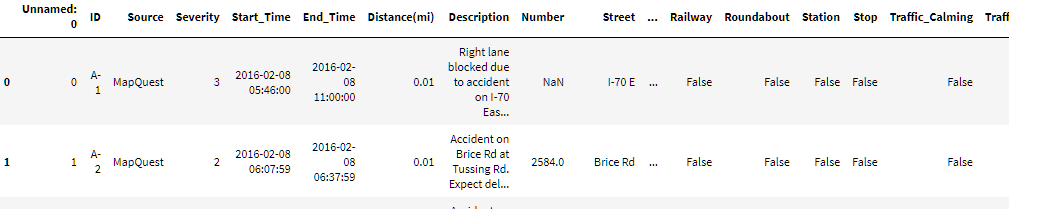

In [ ]:
# Supprimer les valeurs/lignes manquantes de la colonne Description
accidents = accidents.dropna(subset=['Description'])
# Supprimer les doublons
accidents = accidents.drop_duplicates()

#### Approche par mot-clé / Détection de mot
['b','c'] in ['a','b','c','d'] renvoie :
> False 

'bc' in 'abcd' renvoie :
> True

'abcde'[3] renvoie
>'d'

In [ ]:
# Détecter si une chaîne de caractère d'une liste se trouve dans une phrase
def word_detection(liste, phrase):
    for mot in liste :
        if ' ' + mot + ' ' in phrase :    # les espaces permettent de repérer le mot et non juste la chaîne de caractère
                                          # problème : majuscule, s'il y a une ponctuation avant/après....
            return True
    return False

# Depuis un argument mot renvoyer la liste de chaîne de caractère à détecter
caracteres_speciaux = [',', ':', ';', '.']

def possib (mot):
    Liste = []
    Liste.append(' ' + mot + ' ')
    for carac in caracteres_speciaux :      
        Liste.append(' ' + mot + carac)
    Liste.append(mot.capitalize() + ' ')
    for carac in caracteres_speciaux :
        Liste.append(mot.capitalize() + carac)
    return Liste

print(possib(mot = 'mot'))


# Identifier le nombre de ligne contenant un mot 
n=0
for ligne in accidents['Description']:
    for mot in possib('truck'):
        if mot in ligne:
            n+=1
    for mot in possib('trucks'):
        if mot in ligne:
            n+=1
# n = nombre d'accident impliquant au moins un camion

n/len(accidents)*100
# % d'accidents impliquant des camions



In [ ]:
# Créer un dictionnaire trad dont les clés sont les chaînes de caractère que renvoie possib() (sur 'street', 'avenue', road' et 'boulevard') 
# et les valeur sont leur abréviation ('St', 'Ave', 'Rd' et 'Blvd').

dico = {'street':'St', 'avenue':'Ave', 'road':'Rd', 'Boulevard': 'Blvd'}
trad={}
for key in dico :
    for mot, traduction in zip(possib(key), possib(dico[key])):
        trad[mot]=traduction

# Remplacer les mots de la colonne 'Description' par leur abréviation.
for i, e in enumerate(accidents['Description']):
    for key in trad :
        if key in e :
            accidents['Description'][i] = e.replace(key, trad[key])
            
# Compter le nombre d'accidents qui ont eu lieu sur Hollywood Boulevard.
n=0
for e in accidents["Description"]:
    if 'Hollywood Blvd' in e:
        n+=1
print("Il y a eu", n, "accidents sur Hollywood Boulevard")

# 5 - Data Cleaning : exercice guidé

In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv("Ventes_en_ligne.csv")
df = df.reset_index()
df = df.rename(columns={'index' : 'Unnamed: 0'})
df.head(20)

,Unnamed: 0,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
5,5,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,EUR,10,0,5.00,1,...,65,3.507692,5e4b9c3801ba9d210036fc5a,0,NaN,https://www.wish.com/c/5ec645bafd107a02279c8c54,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,summer,2020-08
6,6,Women Fashion Loose Lace Blouse Blouse V Neck ...,Women Fashion Loose Lace Blouse V Neck Bat Sle...,7.00,6,EUR,50000,0,3.84,6742,...,10194,4.076516,5652f4053a698c76dc9a3f37,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5c63a337d5e2ce4bbb3152cf,https://contestimg.wish.com/api/webimage/5c63a...,5c63a337d5e2ce4bbb3152cf,summer,2020-08
7,7,Robe tunique ample femme Robe d'été Robe en je...,Women's Baggy Tunic Dress Summer Dress Denim D...,12.00,11,EUR,1000,0,3.76,286,...,342,3.681287,5d45349676befe65691dcfbb,0,NaN,https://www.wish.com/c/5e0ae5ebc2efb76ccf0a3391,https://contestimg.wish.com/api/webimage/5e0ae...,5e0ae5ebc2efb76ccf0a3391,summer,2020-08
8,8,Robe d'été décontractée à manches courtes pour...,Women's Summer Casual Dress Fashion Short Slee...,11.00,84,EUR,100,1,3.47,15,...,330,3.803030,5d42980e8388970d32294ddc,0,NaN,https://www.wish.com/c/5e6f1fb7fe4a5bb4b8bf36e5,https://contestimg.wish.com/api/webimage/5e6f1...,5e6f1fb7fe4a5bb4b8bf36e5,summer,2020-08
9,9,"Femmes d'été, plus la taille décontractée lâch...",Summer Women Plus Size Casual Loose V Neck Sho...,5.78,22,EUR,5000,0,3.60,687,...,5534,3.999819,5ba2251b4315d12ebce873fa,0,NaN,https://www.wish.com/c/5ccfaf238a8d535cec2dfb47,https://contestimg.wish.com/api/webimage/5ccfa...,5ccfaf238a8d535cec2dfb47,summer,2020-08


In [24]:
# Que représente la 1ère colonne ?
# Pour prouver que c'est l'index, on peut effectuer la vérification suivante (vérifie si une valeur est diff. de l'index)
(df['Unnamed: 0']!=df.index).sum()

0

In [25]:
# Supprimer la colonne 'Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)

In [34]:
# Que renvoie les colonnes theme & crawl_month
print(df['theme'].unique(),"\n")
print(df['crawl_month'].unique())

['summer'] 

['2020-08']


In [ ]:
# Supprimer ces colonnes
df = df.drop('theme', axis=1)
df = df.drop('crawl_month', axis=1)

In [40]:
df.isna().sum(axis=0) # indique combien de NaN par colonne
# On remarque  que les colonnes 'merchant_profile_picture', 'has_urgency_banner' et 'urgency_text' ont un très grand nombre de valeurs manquantes

# Certains vendeurs n'ont pas de photo de profil, cela explique le grand nombre de valeurs manquantes.
print(df['has_urgency_banner'].unique())
# La colonne 'has_urgency_banner' contient 1 si la bannière est active et Nan sinon.
# De la même manière, s'il n'y a pas de bannière, 'urgency_text' contient Nan.

[nan
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5652f4053a698c76dc9a3f37.jpg'
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55ed5a3362e273427107759e.jpg'
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_539937d634067e06707b1a8e.jpg'
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_57108cd6a995b507211ef8fb.jpg'
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5268759b736046671957190c.jpg'
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5660e53e769a564b3e3aeca0.jpg'
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55e7e41e606d0a18fdfc67d1.jpg'
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_580f06685250a20783d33e56.jpg'
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_577fb2b368116418674befd9.jpg'
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimag

In [41]:
# Supprimer photo de profil
df.drop('merchant_profile_picture', axis=1, inplace=True)


In [44]:
print(df['urgency_text'].unique())
# Ne prend que 3 valeurs : présence d'une réduction sur les achats en gros, quantité limitée ou NaN

# Créer 2 colonnes 'quantite_limitee' et 'reduction_achats_gros' qui indiquent respectivement 
# la présence ou l'absence d'une de ces deux bannières.
### créer une colonne 'quantité_limitee'
df.loc[df['urgency_text'] == 'Quantité limitée !', 'quantite_limitee'] = 1
df.loc[df['urgency_text'] != 'Quantité limitée !', 'quantite_limitee'] = 0

### Créer une colonne 'reduction_achats_gros'
df.loc[df['urgency_text'] == 'Réduction sur les achats en gros', 'reduction_achats_gros'] = 1
df.loc[df['urgency_text'] != 'Réduction sur les achats en gros', 'reduction_achats_gros'] = 0
df.head(5)

['Quantité limitée !' nan 'Réduction sur les achats en gros']


,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,theme,crawl_month,quantite_limitee,reduction_achats_gros
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08,1.0,0.0
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08,1.0,0.0
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08,1.0,0.0
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08,0.0,0.0
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,4.001588,5ab3b592c3911a095ad5dadb,0,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08,1.0,0.0


In [45]:
# Supprimer les colonnes 'has_urgency_banner' et 'urgency_text'.
df.drop('urgency_text', axis=1, inplace=True)
df.drop('has_urgency_banner', axis=1, inplace=True)

### Ajout d'un fichier Metadata
Pour créer un fichier .txt nous allons utiliser l'instruction with couplée à la fonction open()

<b>Voici la syntaxe général pour accéder/créer à un fichier : </b>

In [ ]:
with open("nom_fichier.txt", "droit") as f:
        f.methode

- "droit" indique les droits que l'on aura dans la fonction with open(). Les plus courant sont les suivants :
        - "r" pour pouvoir lire "nom_fichier.txt".
        - "a" pour pouvoir ajouter du texte dans "nom_fichier.txt" sans supprimer ce qui est déjà écrit.
        - "w" pour pouvoir créer un fichier nommé "nom_fichier.txt" et écrire à l'intérieur. Si un fichier du même nom existe déjà, il est supprimé et remplacé par celui que nous venons de créer.
- as f signifie que nous allons pouvoir faire appel à ce fichier avec l'alias f, de la même manière que l'on utilise numpy as np par exemple.
- Les méthodes les plus courantes lorsque l'on utilise with open sont les suivantes :
        - f.write("blablabla") utilisée pour écrire à l'intérieur de "nom_fichier.txt".
        - f.read() utilisée pour stocker l'intégralité du texte de "nom_fichier.txt".

In [47]:
with open("meta_data.txt", "w") as f:
    f.write("Ces données ont toutes été récoltées en Août 2020 et chaque ligne correspond à un produit dont le thème est l'été. ")
    
with open ("meta_data.txt", "r") as f:
    f_contenu=f.read()
    print(f_contenu)

Ces données ont toutes été récoltées en Août 2020 et chaque ligne correspond à un produit dont le thème est l'été. 


In [48]:
print(df["product_color"].unique())
print("\n")
print(df["product_variation_size_id"].unique())
# On remarque que des valeurs indiquent la même chose : S, s, size S, Size S...

['white' 'green' 'leopardprint' 'black' 'yellow' 'navyblue' 'blue' 'beige'
 'grey' 'lightblue' 'orange' 'red' 'Black' 'armygreen' nan 'pink' 'khaki'
 'red & blue' 'blue & pink' 'RED' 'white & green' 'winered'
 'black & green' 'purple' 'whitefloral' 'floral' 'fluorescentgreen'
 'orange & camouflage' 'lightyellow' 'coolblack' 'multicolor' 'camouflage'
 'lightpink' 'pink & black' 'silver' 'Army green' 'lightgreen' 'mintgreen'
 'pink & grey' 'gray' 'coffee' 'rose' 'light green' 'leopard'
 'black & white' 'orange-red' 'dustypink' 'White' 'star' 'white & black'
 'apricot' 'skyblue' 'burgundy' 'claret' 'pink & white' 'rosered' 'tan'
 'navy blue' 'wine red' 'lightred' 'Pink' 'coralred' 'brown' 'lakeblue'
 'darkblue' 'camel' 'pink & blue' 'nude' 'Blue' 'lightpurple' 'army'
 'black & stripe' 'Rose red' 'greysnakeskinprint' 'denimblue' 'applegreen'
 'offwhite' 'lightgray' 'navy' 'gray & white' 'brown & yellow'
 'winered & yellow' 'army green' 'whitestripe' 'rainbow' 'lightgrey'
 'watermelonred' '

Dans ce genre de situation, il est courant d'<b>utiliser un dictionnaire et la méthode map()</b>, qui fait la <b>même chose que la fonction replace sauf qu'elle donne par défaut la valeur np.nan à toutes les valeurs qui n'ont pas été précisées dans les dictionnaires.</b>

Les dictionnaires <b>dico_color<b> et <b>dico_size</b> du fichier dico sont rédigés comme de <b>véritables dictionnaires</b>. C'est-à-dire que chaque mot dans le langage initial est une clé dont la valeur est sa traduction dans le langage final.

In [ ]:
from dico import *

# Regroupement des appellations
df['product_variation_size_id'] = df['product_variation_size_id'].map(dico_size)
df['product_color'] = df['product_color'].map(dico_color)

In [50]:
print(df["currency_buyer"].unique())

['EUR']


Dans le cas où la colonne currence_buyer aurait eu des USD, GBP etc...

#### Convertir euros

On a le tableau conversion suivant 
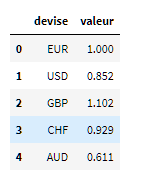

In [ ]:
# Transformer/Passer colonne devise en index
tableau_conversion.set_index("devise", inplace=True)
tableau_conversion
# Créer une Séries contenant la colonne 'valeur'
conversion = pd.Series(tableau_conversion["valeur"])
conversion

# Convertir

### On créée des séries distinctes contenant chacune les prix des produits dans chaque devise

price_AUD = df.loc[df['currency_buyer'] == 'AUD', 'price']
price_USD = df.loc[df['currency_buyer'] == 'USD', 'price']
price_GBP = df.loc[df['currency_buyer'] == 'GBP', 'price']
price_CHF = df.loc[df['currency_buyer'] == 'CHF', 'price']
price_EUR = df.loc[df['currency_buyer'] == 'EUR', 'price']

retail_AUD = df.loc[df['currency_buyer'] == 'AUD', 'retail_price']
retail_USD = df.loc[df['currency_buyer'] == 'USD', 'retail_price']
retail_GBP = df.loc[df['currency_buyer'] == 'GBP', 'retail_price']
retail_CHF = df.loc[df['currency_buyer'] == 'CHF', 'retail_price']
retail_EUR = df.loc[df['currency_buyer'] == 'EUR', 'retail_price']


### On convertie chaque série indépendamment 

price_AUD = price_AUD.apply(lambda x: conversion['AUD']*x)
price_USD = price_USD.apply(lambda x: conversion['USD']*x)
price_GBP = price_GBP.apply(lambda x: conversion['GBP']*x)
price_CHF = price_CHF.apply(lambda x: conversion['CHF']*x)

retail_AUD = retail_AUD.apply(lambda x: conversion['AUD']*x)
retail_USD = retail_USD.apply(lambda x: conversion['USD']*x)
retail_GBP = retail_GBP.apply(lambda x: conversion['GBP']*x)
retail_CHF = retail_CHF.apply(lambda x: conversion['CHF']*x)


### On remplace les anciennes colonnes 'price' et 'retail_price' par la concatenation des series obtenues

df["price"] = pd.concat([price_AUD, price_USD, price_GBP, price_CHF, price_EUR])
df["retail_price"] = pd.concat([retail_AUD, retail_USD, retail_GBP, retail_CHF, retail_EUR])


### Autre solution plus compacte : on regarde les prix pour lesquels on a l'unité qui nous intéresse ('x') & multiplie par conversion['CURRENCY']
df.loc[df['currency_buyer'] == 'AUD', 'price'] = df.loc[df['currency_buyer'] == 'AUD', 'price'].apply(lambda x: conversion['AUD']*x)
df.loc[df['currency_buyer'] == 'AUD', 'retail_price'] = df.loc[df['currency_buyer'] == 'AUD', 'retail_price'].apply(lambda x: conversion['AUD']*x)


In [51]:
# Supprimer la colonne 'currency_buyer'.
df.drop("currency_buyer", axis=1, inplace=True)

# Ajouter une phrase aux metadatas disant que les prix mentionnés dans la base de données sont en Euros.
# Afficher le contenu de "meta_data.txt"
with open("meta_data.txt", "a") as f:
    f.write("Les prix indiqués dans ce fichier sont en Euros.")

with open ("meta_data.txt", "r") as f:
    f_contents = f.read()
    print(f_contents)

Ces données ont toutes été récoltées en Août 2020 et chaque ligne correspond à un produit dont le thème est l'été. Les prix indiqués dans ce fichier sont en Euros.


In [52]:
# Supprimer les doublons de df 
df.drop_duplicates(inplace=True)
# Afficher lignes ne possédant pas d'indentifiant unique
df['product_id'].duplicated(keep=False).sum()

396

In [54]:
### La seule différence entre deux lignes concerne la présence ou l'absence de la bannière 'Quantité Limitée'.
### Cause un dédoublement des lignes dans certains cas. Nous n'allons conserver que la ligne avec la bannière.
# Tri des lignes par 'quantite_limitee'
df = df.sort_values('quantite_limitee', ascending=False)

# Suppression des colonnes qui ont tout d'identique sauf 'quantite_limitee'
df.drop_duplicates(subset=df.columns.drop('quantite_limitee'), inplace=True)

# Afficher de nouveau le nombre de produits ne possédant pas un identifiant unique.
df['product_id'].duplicated(keep=False).sum()

0

Il nous reste désormais les 362 lignes avec un product_id redondant.

En les étudiant rapidement, on s'aperçoit que 2 lignes qui ont le même product_id sont quasiment identiques. La seule différence se fait sur les colonnes 'price', 'retail_price' et 'Quantite_limitee'. Cela est dû à la conversion faite plus en haut en euro, le cours variant constamment.

In [ ]:
df = df.sort_values('quantite_limitee', ascending=False)
# Pour chaque product_id conserver uniquement une des lignes avec la bannière Quantite_limitee.
df.drop_duplicates(subset=df.columns.drop(['price', 'retail_price', 'quantite_limitee']), inplace=True)

#### Gestion des données manquante

In [1]:
# Afficher le nombre de valeurs manquantes par colonne 
df.isna().sum()

NameError: name 'df' is not defined

In [57]:
# Créer une fonction valeur_manquante() qui renvoie uniquement le nom des colonnes avec des valeurs manquantes 
# ainsi que le nombre de NAs associées 
# Compter le nombre de NaN / Valeurs manquantes par oclonnes
def valeur_manquante(df):
    flag=0
    for col in df.columns:
            if df[col].isna().sum() > 0:
                flag=1
                print(f'"{col}": {df[col].isna().sum()} valeurs manquantes')
    if flag==0:
        print("Le dataset ne contient plus de valeurs manquantes, bien joué.")
valeur_manquante(df)

"rating_five_count": 35 valeurs manquantes
"rating_four_count": 35 valeurs manquantes
"rating_three_count": 35 valeurs manquantes
"rating_two_count": 35 valeurs manquantes
"rating_one_count": 35 valeurs manquantes
"product_color": 40 valeurs manquantes
"product_variation_size_id": 13 valeurs manquantes
"origin_country": 13 valeurs manquantes
"merchant_name": 2 valeurs manquantes
"merchant_info_subtitle": 1 valeurs manquantes


In [2]:
# Regardons les lignes où se trouvent les valeurs manquantes.
df.loc[pd.isnull(df["rating_five_count"]), ["rating","rating_count","rating_five_count", 
     "rating_four_count", "rating_three_count", "rating_two_count", "rating_one_count"]] # 45 NaN présents sur les mêmes lignes & rating_count = 0

NameError: name 'df' is not defined

In [58]:
# Remplacer les valeurs manquantes des 5 colonnes 'rating_n_count' par 0.
df[["rating_five_count", "rating_four_count", "rating_three_count", "rating_two_count", 
    "rating_one_count"]] = df[["rating_five_count", "rating_four_count", "rating_three_count", 
    "rating_two_count", "rating_one_count"]].replace(np.nan, 0)

valeur_manquante(df)

"product_color": 40 valeurs manquantes
"product_variation_size_id": 13 valeurs manquantes
"origin_country": 13 valeurs manquantes
"merchant_name": 2 valeurs manquantes
"merchant_info_subtitle": 1 valeurs manquantes


In [59]:
# Valeurs prises par "origin_country"
print("Valeurs prises par 'origin_country :'", df["origin_country"].unique())
print("Nombre de produits sans pays d'origine :", len(df.loc[pd.isnull(df["origin_country"])]), "\n")

# Vendeurs de produits à origine inconnue 
print("Vendeurs de produits à origine inconnue :",df.loc[pd.isnull(df["origin_country"]), "merchant_name"].unique(), "\n")

# Origines des différents produits de ces vendeurs
liste_vendeur = ['maryswill', 'topmanclothing', 'clothingloves', 'businessindustry', 'fashionshow', 'maxnina']

print("Origines des différents produits de ces vendeurs :", df.loc[df["merchant_name"].isin(liste_vendeur), "origin_country"].unique())

# Aucun des produits de ces vendeurs n'a d'origine connue (la seule valeur est nan).

Valeurs prises par 'origin_country :' ['CN' 'US' 'VE' nan 'SG' 'AT' 'GB']
Nombre de produits sans pays d'origine : 13 

Vendeurs de produits à origine inconnue : ['maryswill' 'maxnina' 'fashionshow' 'topmanclothing' 'businessindustry'
 'clothingloves'] 

Origines des différents produits de ces vendeurs : [nan]


In [60]:
# Remplacer les valeurs manquantes de 'origin_country' par 'other'.
df["origin_country"] = df["origin_country"].fillna('other')

# Actualisation des valeurs manquantes
valeur_manquante(df)

"product_color": 40 valeurs manquantes
"product_variation_size_id": 13 valeurs manquantes
"merchant_name": 2 valeurs manquantes
"merchant_info_subtitle": 1 valeurs manquantes


In [61]:
print(df.loc[pd.isnull(df["merchant_name"]), 'merchant_title'])
# Afficher tous les produits ayant pour 'merchant_title' les valeurs trouvées précédemment.
df[["merchant_name","merchant_title"]].loc[df["merchant_title"]=='DERNMUUR']

1103    DERNMUUR
1350    DERNMUUR
Name: merchant_title, dtype: object


,merchant_name,merchant_title
1103,NaN,DERNMUUR
1350,NaN,DERNMUUR


In [62]:
# Remplacer les 2 valeurs manquantes de 'merchant_name' par "DERNMUUR".
df["merchant_name"]=df["merchant_name"].fillna('DERNMUUR')
print(valeur_manquante(df))
# Supprimer la dernière ligne contenant une valeur manquante dans la colonne 'merchant_info_subtitle' puis vérifier qu'il n'y a plus de valeur manquante dans le jeu de données.
df.dropna(inplace=True)
valeur_manquante(df)

"product_color": 40 valeurs manquantes
"product_variation_size_id": 13 valeurs manquantes
"merchant_info_subtitle": 1 valeurs manquantes
None
Le dataset ne contient plus de valeurs manquantes, bien joué.
